# Test Prediction #

This script is used to test the prediction algorithm used to estimate how accurate a move is.

### Import dependencies ###

In [79]:
import numpy as np
from numpy.linalg import norm
import math
from mediapipe.framework.formats import landmark_pb2
from dataclasses import dataclass
from typing import List, Optional, Tuple, Union, Mapping
import mediapipe as mp
from matplotlib import pyplot as plt

### Import data ###

In [10]:
pose_1 = [{"x": 0.3913237452507019, "y": 0.17700499296188354, "z": 0.043442994356155396, "visibility": 0.9995575547218323}, {"x": 0.391274631023407, "y": 0.1555335819721222, "z": -0.0027227129321545362, "visibility": 0.9998001456260681}, {"x": 0.3919898569583893, "y": 0.15513715147972107, "z": -0.0030000582337379456, "visibility": 0.9997807145118713}, {"x": 0.3923543095588684, "y": 0.15484100580215454, "z": -0.002771149855107069, "visibility": 0.9997877478599548}, {"x": 0.39763256907463074, "y": 0.15389296412467957, "z": 0.03925305977463722, "visibility": 0.9998594522476196}, {"x": 0.40376150608062744, "y": 0.15246060490608215, "z": 0.03866018354892731, "visibility": 0.9998899698257446}, {"x": 0.4098389148712158, "y": 0.15062978863716125, "z": 0.038284119218587875, "visibility": 0.9999169111251831}, {"x": 0.415940523147583, "y": 0.15621605515480042, "z": -0.13368181884288788, "visibility": 0.999745786190033}, {"x": 0.43650558590888977, "y": 0.15070387721061707, "z": 0.05355879291892052, "visibility": 0.9998314380645752}, {"x": 0.4005463719367981, "y": 0.1957184374332428, "z": 0.012540491297841072, "visibility": 0.9983684420585632}, {"x": 0.4085671007633209, "y": 0.19412055611610413, "z": 0.06253163516521454, "visibility": 0.9982044696807861}, {"x": 0.4031807482242584, "y": 0.27202534675598145, "z": -0.23258279263973236, "visibility": 0.9992393255233765}, {"x": 0.5795345306396484, "y": 0.2371300756931305, "z": 0.11414336413145065, "visibility": 0.9988137483596802}, {"x": 0.299913227558136, "y": 0.3834589719772339, "z": -0.3209392726421356, "visibility": 0.9466897249221802}, {"x": 0.6880988478660583, "y": 0.3271043300628662, "z": 0.1959245651960373, "visibility": 0.3011675179004669}, {"x": 0.16978135704994202, "y": 0.47812777757644653, "z": -0.31728747487068176, "visibility": 0.6454644203186035}, {"x": 0.608462929725647, "y": 0.38714179396629333, "z": 0.29843848943710327, "visibility": 0.028032923117280006}, {"x": 0.14590072631835938, "y": 0.50032639503479, "z": -0.3449578881263733, "visibility": 0.6782252788543701}, {"x": 0.5950765013694763, "y": 0.4029569625854492, "z": 0.3089923858642578, "visibility": 0.03488915413618088}, {"x": 0.1421709954738617, "y": 0.4958399832248688, "z": -0.33639755845069885, "visibility": 0.6859243512153625}, {"x": 0.5810278654098511, "y": 0.3984207212924957, "z": 0.277858167886734, "visibility": 0.03323802351951599}, {"x": 0.15167304873466492, "y": 0.49290284514427185, "z": -0.30759623646736145, "visibility": 0.5549103617668152}, {"x": 0.5840736627578735, "y": 0.3938447833061218, "z": 0.2876247465610504, "visibility": 0.02868473529815674}, {"x": 0.4782330095767975, "y": 0.5420079231262207, "z": -0.10951773822307587, "visibility": 0.9999566078186035}, {"x": 0.5762471556663513, "y": 0.5359991788864136, "z": 0.10897650569677353, "visibility": 0.9999428987503052}, {"x": 0.2496422827243805, "y": 0.6285795569419861, "z": 0.05436859279870987, "visibility": 0.9165734648704529}, {"x": 0.7041707038879395, "y": 0.6713168621063232, "z": 0.24320484697818756, "visibility": 0.8477353453636169}, {"x": 0.27396267652511597, "y": 0.8398960828781128, "z": 0.059845250099897385, "visibility": 0.982637345790863}, {"x": 0.8804731965065002, "y": 0.8079265356063843, "z": 0.21406318247318268, "visibility": 0.9385940432548523}, {"x": 0.29811543226242065, "y": 0.880474328994751, "z": 0.058304671198129654, "visibility": 0.9883741140365601}, {"x": 0.908218264579773, "y": 0.8373792171478271, "z": 0.21403414011001587, "visibility": 0.9697825908660889}, {"x": 0.17215444147586823, "y": 0.8683971166610718, "z": 0.019091473892331123, "visibility": 0.9631621837615967}, {"x": 0.8883779644966125, "y": 0.8213233947753906, "z": 0.1981578916311264, "visibility": 0.8796525001525879}]
pose_2 = [{"x": 0.35380399227142334, "y": 0.16293694078922272, "z": -0.11586679518222809, "visibility": 0.9999572038650513}, {"x": 0.36012035608291626, "y": 0.14236748218536377, "z": -0.1467953473329544, "visibility": 0.999895453453064}, {"x": 0.36432597041130066, "y": 0.14163315296173096, "z": -0.14726077020168304, "visibility": 0.9999024868011475}, {"x": 0.36788201332092285, "y": 0.14071136713027954, "z": -0.14702200889587402, "visibility": 0.9999158382415771}, {"x": 0.3596390187740326, "y": 0.14177748560905457, "z": -0.08827612549066544, "visibility": 0.9998995065689087}, {"x": 0.3634569048881531, "y": 0.14092636108398438, "z": -0.08888398855924606, "visibility": 0.9999125003814697}, {"x": 0.36714738607406616, "y": 0.13974416255950928, "z": -0.08910621702671051, "visibility": 0.9999268054962158}, {"x": 0.400007039308548, "y": 0.14169403910636902, "z": -0.2185724973678589, "visibility": 0.9999544620513916}, {"x": 0.3971427381038666, "y": 0.1426694691181183, "z": 0.051481202244758606, "visibility": 0.9998902082443237}, {"x": 0.3691764175891876, "y": 0.18103986978530884, "z": -0.132206529378891, "visibility": 0.9999079704284668}, {"x": 0.36944130063056946, "y": 0.1810009777545929, "z": -0.058615971356630325, "visibility": 0.9998317956924438}, {"x": 0.49573051929473877, "y": 0.24259328842163086, "z": -0.34599176049232483, "visibility": 0.9999786615371704}, {"x": 0.3970660865306854, "y": 0.2634504735469818, "z": 0.27933940291404724, "visibility": 0.9996339082717896}, {"x": 0.6263858675956726, "y": 0.3427425026893616, "z": -0.48232072591781616, "visibility": 0.9871542453765869}, {"x": 0.23875001072883606, "y": 0.29073894023895264, "z": 0.3984746038913727, "visibility": 0.19370071589946747}, {"x": 0.5262464284896851, "y": 0.42369380593299866, "z": -0.5316426753997803, "visibility": 0.935828447341919}, {"x": 0.09660831838846207, "y": 0.2806864380836487, "z": 0.2963632047176361, "visibility": 0.6900315880775452}, {"x": 0.48604580760002136, "y": 0.44314879179000854, "z": -0.5711615085601807, "visibility": 0.9235415458679199}, {"x": 0.05402874946594238, "y": 0.28596368432044983, "z": 0.2910284996032715, "visibility": 0.7311884760856628}, {"x": 0.4752209186553955, "y": 0.4253338873386383, "z": -0.5609955191612244, "visibility": 0.9165323376655579}, {"x": 0.04934579133987427, "y": 0.2840477228164673, "z": 0.24868491291999817, "visibility": 0.7370977997779846}, {"x": 0.4863653779029846, "y": 0.419037789106369, "z": -0.522162914276123, "visibility": 0.8640652298927307}, {"x": 0.06681820750236511, "y": 0.2835002839565277, "z": 0.26858285069465637, "visibility": 0.7530436515808105}, {"x": 0.5098406672477722, "y": 0.5217736959457397, "z": -0.20555400848388672, "visibility": 0.9998592138290405}, {"x": 0.44669637084007263, "y": 0.5230879187583923, "z": 0.20531214773654938, "visibility": 0.9997139573097229}, {"x": 0.6233655214309692, "y": 0.6988922953605652, "z": -0.36442631483078003, "visibility": 0.9877386093139648}, {"x": 0.2744681239128113, "y": 0.606305718421936, "z": 0.1718510389328003, "visibility": 0.5369914770126343}, {"x": 0.8548891544342041, "y": 0.8472495079040527, "z": -0.5560551881790161, "visibility": 0.9946392178535461}, {"x": 0.3423374891281128, "y": 0.792690634727478, "z": 0.31032344698905945, "visibility": 0.7138617038726807}, {"x": 0.9004228711128235, "y": 0.8748068809509277, "z": -0.5873385071754456, "visibility": 0.9733663201332092}, {"x": 0.3770814836025238, "y": 0.8348142504692078, "z": 0.3179900646209717, "visibility": 0.844089150428772}, {"x": 0.772468090057373, "y": 0.9014390707015991, "z": -0.8211914300918579, "visibility": 0.9935316443443298}, {"x": 0.2248748391866684, "y": 0.8437947630882263, "z": 0.24730946123600006, "visibility": 0.812123715877533}]

### Convert data into array ###

In [38]:
pose_1_array = []
pose_1_visibility = []
pose_2_array = []

for pose1, pose2 in zip(pose_1, pose_2):
    pose_1_array.extend([pose1['x'], pose1['y'], pose1['z']])
    pose_1_visibility.extend([pose1['visibility']])
    pose_2_array.extend([pose2['x'], pose2['y'], pose2['z']])

print(pose_1_array)
print(pose_1_visibility)
print(pose_2_array)

[0.3913237452507019, 0.17700499296188354, 0.043442994356155396, 0.391274631023407, 0.1555335819721222, -0.0027227129321545362, 0.3919898569583893, 0.15513715147972107, -0.0030000582337379456, 0.3923543095588684, 0.15484100580215454, -0.002771149855107069, 0.39763256907463074, 0.15389296412467957, 0.03925305977463722, 0.40376150608062744, 0.15246060490608215, 0.03866018354892731, 0.4098389148712158, 0.15062978863716125, 0.038284119218587875, 0.415940523147583, 0.15621605515480042, -0.13368181884288788, 0.43650558590888977, 0.15070387721061707, 0.05355879291892052, 0.4005463719367981, 0.1957184374332428, 0.012540491297841072, 0.4085671007633209, 0.19412055611610413, 0.06253163516521454, 0.4031807482242584, 0.27202534675598145, -0.23258279263973236, 0.5795345306396484, 0.2371300756931305, 0.11414336413145065, 0.299913227558136, 0.3834589719772339, -0.3209392726421356, 0.6880988478660583, 0.3271043300628662, 0.1959245651960373, 0.16978135704994202, 0.47812777757644653, -0.31728747487068176

### Cosine distance function ###

In [56]:
def cosine_distance(pose1, pose2):
    A = np.array(pose1)
    B = np.array(pose2)
    return 1 - (np.dot(A,B)/(norm(A)*norm(B)))

In [64]:
cosine_similarity = 1 - cosine_distance(pose_1_array, pose_2_array)
print(cosine_similarity)

0.8130276396662933


### Weighted matching function ###

In [42]:
def weighted_matching(pose1, pose2, visibility):
    sum1 = 1 / np.sum(visibility)

    sum2 = 0

    for i in range(len(pose1)):
        index = math.floor(i/3)
        sum2 += visibility[index] * abs(pose1[i] - pose2[i])

    return sum1 * sum2

In [65]:
weighted_similarity = 1 - weighted_matching(pose_1_array, pose_2_array, pose_1_visibility)
print(weighted_similarity)

0.5378261445909032


### Mediapipe constants and tools ###

In [102]:
WHITE_COLOR = (224, 224, 224)
BLACK_COLOR = (0, 0, 0)
RED_COLOR = (0, 0, 255)
BLUE_COLOR = (255, 0, 0)
GREY_COLOR = (105, 105, 105)

_PRESENCE_THRESHOLD = 0.001
_VISIBILITY_THRESHOLD = 0.001

@dataclass
class DrawingSpec:
    color: Tuple[int, int, int] = WHITE_COLOR
    thickness: int = 2
    circle_radius: int = 2

def _normalize_color(color):
    return tuple(v / 255. for v in color)

def _normalized_to_pixel_coordinates(
        normalized_x: float, normalized_y: float, image_width: int,
        image_height: int) -> Union[None, Tuple[int, int]]:
    """Converts normalized value pair to pixel coordinates."""

    # Checks if the float value is between 0 and 1.
    def is_valid_normalized_value(value: float) -> bool:
        return (value > 0 or math.isclose(0, value)) and (value < 1 or math.isclose(1, value))
        
    x_px = min(math.floor(normalized_x * image_width), image_width - 1)
    y_px = min(math.floor(normalized_y * image_height), image_height - 1)
    return x_px, y_px

### Plot poses ###

In [103]:
def plot_landmarks(landmark_list_1: landmark_pb2.NormalizedLandmarkList,
                   landmark_list_2: landmark_pb2.NormalizedLandmarkList,
                   connections: Optional[List[Tuple[int, int]]] = None,
                   landmark_drawing_spec: DrawingSpec = DrawingSpec(
                       color=[RED_COLOR, BLUE_COLOR], thickness=5),
                   connection_drawing_spec: DrawingSpec = DrawingSpec(
                       color=[BLACK_COLOR, GREY_COLOR], thickness=5),
                   elevation: int = 10,
                   azimuth: int = 10):

    if not (landmark_list_1 or landmark_list_2):
        return
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.view_init(elev=elevation, azim=azimuth)
    plotted_landmarks_1 = {}
    for idx, landmark in enumerate(landmark_list_1.landmark):
        if ((landmark.HasField('visibility') and
             landmark.visibility < _VISIBILITY_THRESHOLD) or
            (landmark.HasField('presence') and
             landmark.presence < _PRESENCE_THRESHOLD)):
            continue
        ax.scatter3D(
            xs=[-landmark.z],
            ys=[landmark.x],
            zs=[-landmark.y],
            color=_normalize_color(landmark_drawing_spec.color[0]),
            linewidth=landmark_drawing_spec.thickness)
        plotted_landmarks_1[idx] = (-landmark.z, landmark.x, -landmark.y)
    if connections:
        num_landmarks = len(landmark_list_1.landmark)
        # Draws the connections if the start and end landmarks are both visible.
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            if not (0 <= start_idx < num_landmarks and 0 <= end_idx < num_landmarks):
                raise ValueError(f'Landmark index is out of range. Invalid connection '
                                 f'from landmark #{start_idx} to landmark #{end_idx}.')
            if start_idx in plotted_landmarks_1 and end_idx in plotted_landmarks_1:
                landmark_pair = [
                    plotted_landmarks_1[start_idx], plotted_landmarks_1[end_idx]
                ]
                ax.plot3D(
                    xs=[landmark_pair[0][0], landmark_pair[1][0]],
                    ys=[landmark_pair[0][1], landmark_pair[1][1]],
                    zs=[landmark_pair[0][2], landmark_pair[1][2]],
                    color=_normalize_color(
                        connection_drawing_spec.color[1]),
                    linewidth=connection_drawing_spec.thickness)

    plotted_landmarks_2 = {}
    for idx, landmark in enumerate(landmark_list_2.landmark):
        if ((landmark.HasField('visibility') and
             landmark.visibility < _VISIBILITY_THRESHOLD) or
            (landmark.HasField('presence') and
             landmark.presence < _PRESENCE_THRESHOLD)):
            continue
        ax.scatter3D(
            xs=[-landmark.z],
            ys=[landmark.x],
            zs=[-landmark.y],
            color=_normalize_color(landmark_drawing_spec.color[1]),
            linewidth=landmark_drawing_spec.thickness)
        plotted_landmarks_2[idx] = (-landmark.z, landmark.x, -landmark.y)
    if connections:
        num_landmarks = len(landmark_list_2.landmark)
        # Draws the connections if the start and end landmarks are both visible.
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            if not (0 <= start_idx < num_landmarks and 0 <= end_idx < num_landmarks):
                raise ValueError(f'Landmark index is out of range. Invalid connection '
                                 f'from landmark #{start_idx} to landmark #{end_idx}.')
            if start_idx in plotted_landmarks_2 and end_idx in plotted_landmarks_2:
                landmark_pair = [
                    plotted_landmarks_2[start_idx], plotted_landmarks_2[end_idx]
                ]
                ax.plot3D(
                    xs=[landmark_pair[0][0], landmark_pair[1][0]],
                    ys=[landmark_pair[0][1], landmark_pair[1][1]],
                    zs=[landmark_pair[0][2], landmark_pair[1][2]],
                    color=_normalize_color(
                        connection_drawing_spec.color[0]),
                    linewidth=connection_drawing_spec.thickness)

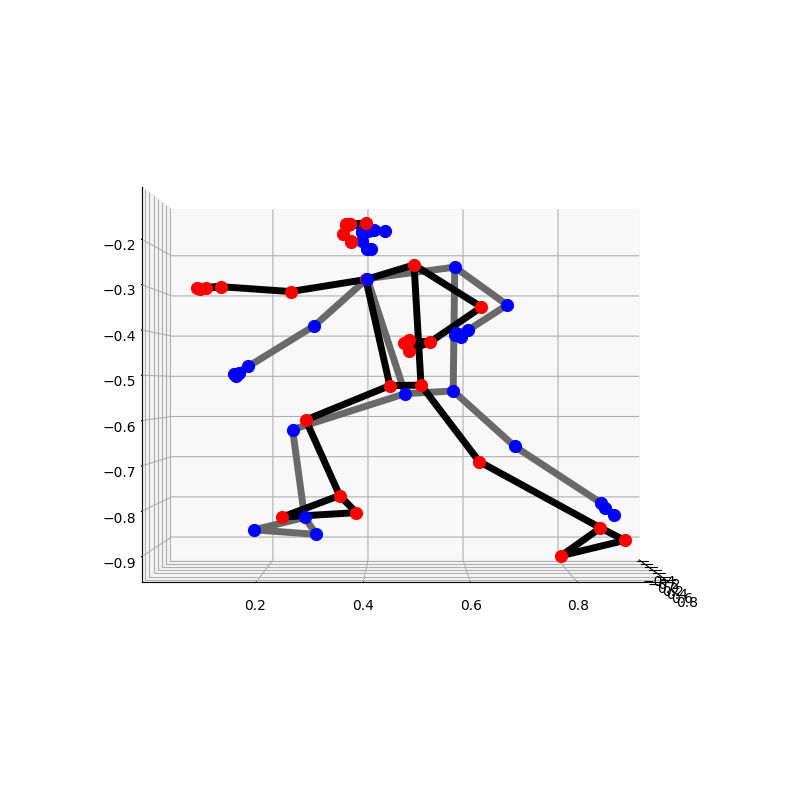

In [110]:
landmark_subset_1 = landmark_pb2.NormalizedLandmarkList(
    landmark = pose_1
)

landmark_subset_2 = landmark_pb2.NormalizedLandmarkList(
    landmark = pose_2
)

plot_landmarks(landmark_subset_1, landmark_subset_2, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)